In [1]:
import os, sys, time
from scipy import stats
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import numpy as np
%matplotlib inline

from IPython.display import display, HTML

if (sys.version_info < (3, 0)):
    HTML('''<script>
    code_show=true; 
    function code_toggle() {
     if (code_show){
     $('div.input').hide();
     } else {
     $('div.input').show();
     }
     code_show = !code_show
    } 
    $( document ).ready(code_toggle);
    </script>
    <form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')


In [2]:
# Create timestamp to show when this summary was run
print('Summary run: ' + time.strftime("%a, %d %b %Y %H:%M"))

Summary run: Thu, 20 Apr 2023 04:26


In [3]:
relative_path = '../../../../outputs'
pd.options.display.float_format = '{:0,.0f}'.format
format_percent = "{:,.2%}".format

# Traffic Counts
----
### Daily | By Facility Type

In [4]:
df = pd.read_csv(os.path.join(relative_path,'validation','daily_volume.csv'))
df[['modeled','observed']] = df[['modeled','observed']].astype('float')

In [5]:
_df = df.groupby('@facilitytype').sum()[['observed','modeled']]
_df.loc['Total',:] = _df.sum().values
_df['diff'] = _df['modeled']-_df['observed']
_df['percent_diff'] = _df['diff']/_df['observed']
_df[['percent_diff']] = _df[['percent_diff']].applymap(format_percent)
_df

,observed,modeled,diff,percent_diff
@facilitytype,,,,
Arterial,"25,640,998","24,250,044","-1,390,954",-5.42%
Collector,"4,301,175","3,649,135","-652,040",-15.16%
Freeway,"28,356,427","29,368,781","1,012,354",3.57%
Ramp,"753,376","626,904","-126,472",-16.79%
Total,"59,051,976","57,894,864","-1,157,112",-1.96%


----
### Daily | By County

In [6]:
df = pd.read_csv(os.path.join(relative_path,'validation','daily_volume_county_facility.csv'))
df[['modeled','observed']] = df[['modeled','observed']].astype('float')

_df = df.groupby('county').sum()[['observed','modeled']]
_df.loc['Total',:] = _df.sum().values
_df['diff'] = _df['modeled']-_df['observed']
_df['percent_diff'] = _df['diff']/_df['observed']
_df[['percent_diff']] = _df[['percent_diff']].applymap(format_percent)
_df

,observed,modeled,diff,percent_diff
county,,,,
King,"31,186,220","31,711,182","524,962",1.68%
Kitsap,"4,564,315","3,815,847","-748,468",-16.40%
Pierce,"13,917,538","13,135,268","-782,270",-5.62%
Snohomish,"9,383,903","9,232,567","-151,336",-1.61%
Total,"59,051,976","57,894,864","-1,157,112",-1.96%


----
### Daily | Scatterplots 

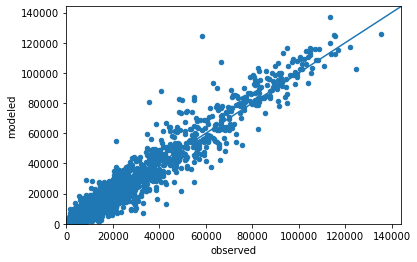

In [7]:
df = pd.read_csv(os.path.join(relative_path,'validation','daily_volume.csv'))
ax = df.plot(kind='scatter', x='observed', y='modeled')
lim = df[['observed','modeled']].max().max()*1.05
ax.set_ylim(0,lim)
ax.set_xlim(0,lim)
x = np.linspace(*ax.get_xlim())
ax.plot(x, x)

In [8]:
slope, intercept, r_value, p_value, std_err = stats.linregress(df['observed'],df['modeled'])
print('r^2: ' + str(r_value))

r^2: 0.9681652770075391


---
By County

King r^2: 0.9732036740757164
Kitsap r^2: 0.9598128891045276
Pierce r^2: 0.9634863953388142
Snohomish r^2: 0.9594715500291472


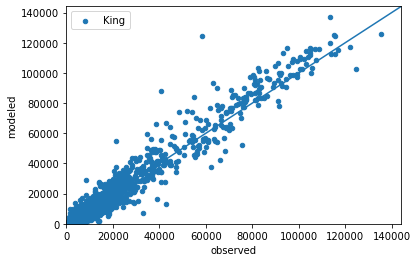

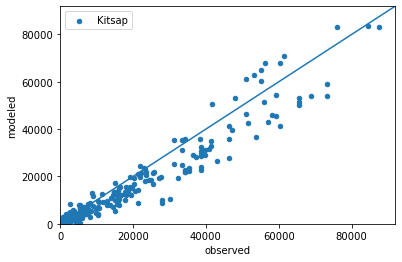

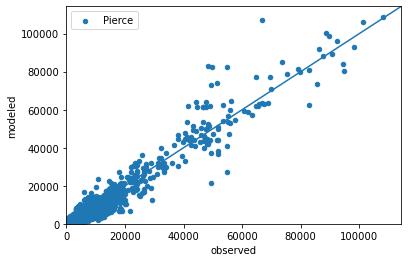

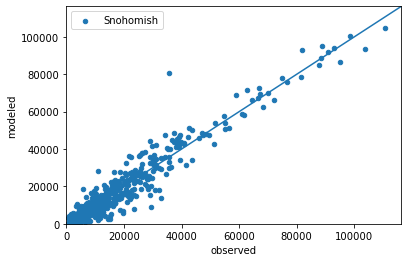

In [9]:
for county in np.unique(df['county']):
    _df = df[df['county'] == county]
    ax = _df.plot(kind='scatter', x='observed', y='modeled', label=county)
    lim = _df[['observed','modeled']].max().max()*1.05
    ax.set_ylim(0,lim)
    ax.set_xlim(0,lim)
    slope, intercept, r_value, p_value, std_err = stats.linregress(_df['observed'],_df['modeled'])
    x = np.linspace(*ax.get_xlim())
    ax.plot(x, x)
    print(str(county) + ' r^2: ' + str(r_value))

---
By Facility Type

r^2 Freeway: 0.9344201702184766
r^2 Arterial: 0.886923678430181


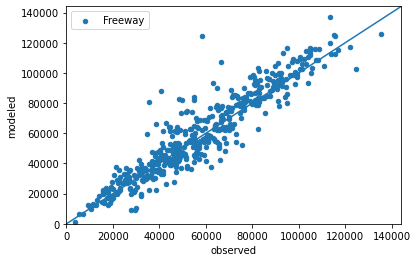

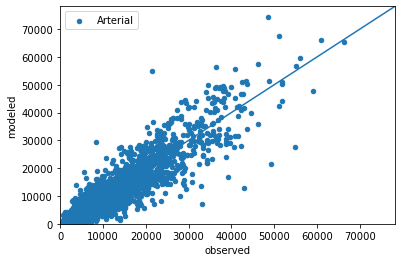

In [10]:
for factype in ['Freeway','Arterial']:
    _df = df[df['@facilitytype'] == factype]
    ax = _df.plot(kind='scatter', x='observed', y='modeled', label=factype)
    lim = _df[['observed','modeled']].max().max()*1.05
    ax.set_ylim(0,lim)
    ax.set_xlim(0,lim)
    x = np.linspace(*ax.get_xlim())
    ax.plot(x, x)
    slope, intercept, r_value, p_value, std_err = stats.linregress(_df['observed'],_df['modeled'])
    print('r^2 ' + str(factype) + ': ' + str(r_value))

**Hourly Volumes**


r^2: 0.9232356781546267


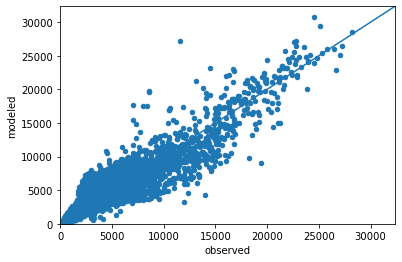

In [11]:
df = pd.read_csv(os.path.join(relative_path,'validation','hourly_volume.csv'))
ax = df.plot(kind='scatter', x='observed', y='modeled')
lim = df[['observed','modeled']].max().max()*1.05
ax.set_ylim(0,lim)
ax.set_xlim(0,lim)
x = np.linspace(*ax.get_xlim())
ax.plot(x, x)
slope, intercept, r_value, p_value, std_err = stats.linregress(df['observed'],df['modeled'])
print('r^2: ' + str(r_value))

# Screenlines

In [12]:
df = pd.read_csv(os.path.join(relative_path,'validation','screenlines.csv'))
df = df.append(df.sum(numeric_only=True), ignore_index=True)
df.at[df.index[-1], 'name'] = 'TOTAL'
#df.at['C', 'name'] = 10
df['percent_diff'] = df['diff']/df['observed']
df[['percent_diff']] = df[['percent_diff']].applymap(format_percent)
df

,name,observed,modeled,county,diff,percent_diff
0,AUBURN - SOUTH KING,"568,417","565,492",King,"-2,925",-0.51%
1,KENT,"550,322","539,865",King,"-10,457",-1.90%
2,SEATTLE - SOUTH OF CBD,"526,500","554,380",King,"27,880",5.30%
3,SHIP CANAL,"519,802","583,100",King,"63,298",12.18%
4,KIRKLAND-REDMOND,"414,120","425,213",King,"11,093",2.68%
5,MILL CREEK,"400,848","409,188",King,"8,340",2.08%
6,SOUTH BELLEVUE,"399,500","389,154",King,"-10,346",-2.59%
7,SEATTLE - NORTH,"372,000","391,257",King,"19,257",5.18%
8,TACOMA - EAST OF CBD,"312,164","347,462",Pierce,"35,298",11.31%
9,PARKLAND,"304,322","293,077",Pierce,"-11,245",-3.70%


r^2 : 0.993298839060629


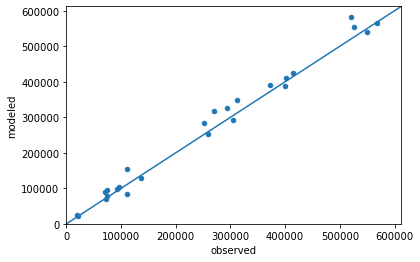

In [13]:
df = df.head(-1)
ax = df.plot(kind='scatter', x='observed', y='modeled')
lim = df[['observed','modeled']].max().max()*1.05
ax.set_ylim(0,lim)
ax.set_xlim(0,lim)
x = np.linspace(*ax.get_xlim())
ax.plot(x, x)
slope, intercept, r_value, p_value, std_err = stats.linregress(df['observed'],df['modeled'])
print('r^2 : ' + str(r_value))

# Transit Boarding
----
### By Agency

In [14]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'daily_boardings_by_agency.csv')

df[['observed_5to20','modeled_5to20','diff']] = df[['observed_5to20','modeled_5to20','diff']].astype('float')
df[['perc_diff']] = df[['perc_diff']].applymap(format_percent)
df.sort_values('observed_5to20', ascending=False)

,agency,observed_5to20,modeled_5to20,diff,perc_diff
2,King County Metro,"392,694","415,833","23,139",5.89%
5,Sound Transit,"148,468","178,499","30,031",20.23%
0,Community Transit,"30,918","34,941","4,023",13.01%
4,Pierce Transit,"27,233","38,856","11,623",42.68%
6,Washington Ferries,"16,912","15,120","-1,792",-10.60%
3,Kitsap Transit,"8,669","15,425","6,755",77.92%
1,Everett Transit,"3,290","1,954","-1,336",-40.61%


----
### Key Routes
#### Ferries

In [15]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'daily_boardings_key_routes.csv', index_col='description')
df[['observed_5to20','modeled_5to20']] = df[['observed_5to20','modeled_5to20']].astype('float')
_df = df[df['route_code'].isin([5001,5002,5003,5004,5005,5006,5007,1973,1975])].reset_index()
_df.drop(['route_code','agency'], axis=1, inplace=True)
_df[['perc_diff']] = _df[['perc_diff']].applymap(format_percent)
_df

,description,observed_5to20,modeled_5to20,diff,perc_diff
0,POF Seattle - West S,"1,356",660,-696,-51.33%
1,POF Seattle - Vashon,670,519,-151,-22.55%
2,WSF Kingston - Edmon,"1,732",515,"-1,217",-70.26%
3,WSF Bainbridge Islan,"8,857","10,631","1,774",20.03%
4,WSF Bremerton - Seat,"4,484","1,838","-2,646",-59.01%
5,WSF Fauntleroy - Sou,365,26,-340,-93.01%
6,WSF Vashon Island -,946,"1,491",545,57.64%
7,WSF Southworth - Vas,239,326,87,36.44%
8,WSF Point Defiance -,289,293,5,1.60%


r^2 : 0.9364733622746307


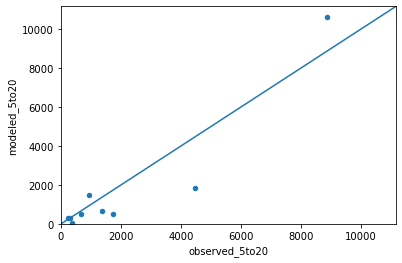

In [16]:
if len(_df) > 0:
    ax = _df.plot(kind='scatter', x='observed_5to20', y='modeled_5to20')
    lim = _df[['observed_5to20','modeled_5to20']].max().max()*1.05
    ax.set_ylim(0,lim)
    ax.set_xlim(0,lim)
    x = np.linspace(*ax.get_xlim())
    ax.plot(x, x)
    slope, intercept, r_value, p_value, std_err = stats.linregress(_df['observed_5to20'],_df['modeled_5to20'])
    print('r^2 ' + str('') + ': ' + str(r_value))

#### Bikes on Ferries

In [17]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'bike_ferry_boardings.csv')
df['route_code'] = df['route_code'].astype('int')
df[['route_code','description', '@bvol']].sort_values('@bvol', ascending=False)

,route_code,description,@bvol
4,4202,POF Bremerton - Anna,461
3,4201,POF Bremerton - Pt O,438
0,1973,POF West Seattle - S,368
7,5003,WSF Bremerton - Seat,330
1,1975,POF Vashon Island -,265
2,4200,POF Seattle - Bremer,199
10,5007,WSF Point Defiance -,156
6,5002,WSF Bainbridge Islan,149
9,5006,WSF Southworth - Vas,126
8,5005,WSF Vashon Island -,118


#### Rail

In [18]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'daily_boardings_key_routes.csv', index_col='description')
df[['observed_5to20','modeled_5to20']] = df[['observed_5to20','modeled_5to20']].astype('float')
_df = df[df['route_code'].isin([6996,6999,6998])].reset_index()
_df['description'] = _df['route_code'].map({6998: 'Sounder South', 6999: 'Sounder North',6996: 'Link Red Line'})
_df.drop(['route_code','agency'], axis=1, inplace=True)
_df[['perc_diff']] = _df[['perc_diff']].applymap(format_percent)

_df

,description,observed_5to20,modeled_5to20,diff,perc_diff
0,Link Red Line,"69,383","74,816","5,433",7.83%
1,Sounder South,"15,356","20,230","4,874",31.74%
2,Sounder North,"1,667","2,618",951,57.04%


r^2 : 0.9990422862922472


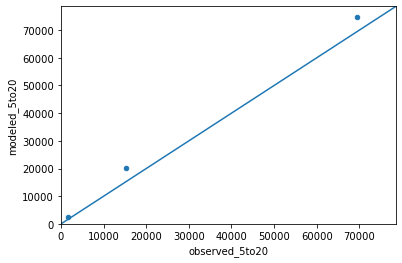

In [19]:
if len(_df) > 0: 
    ax = _df.plot(kind='scatter', x='observed_5to20', y='modeled_5to20')
    lim = _df[['observed_5to20','modeled_5to20']].max().max()*1.05
    ax.set_ylim(0,lim)
    ax.set_xlim(0,lim)
    x = np.linspace(*ax.get_xlim())
    ax.plot(x, x)
    slope, intercept, r_value, p_value, std_err = stats.linregress(_df['observed_5to20'],_df['modeled_5to20'])
    print('r^2 ' + str('') + ': ' + str(r_value))

#### RapidRide, Busiest Buses, Streetcar

In [20]:
_df = df[df['route_code'].isin([1671,1672,1673,1674,1675,1676,6550,1007,1040,1997,1998])].reset_index()
_df['description'] = _df['route_code'].map({1671: 'A Line RapidRide', 1672: 'B Line RapidRide',
                                            1673: 'C Line RapidRide', 1674: 'D Line RapidRide',
                                            1675: 'E Line RapidRide', 1676: 'F Line RapidRide',
                                            6550: 'Sound Transit 550', 1040: 'KC Metro 40', 1007: 'KC Metro 7',
                                            1997: 'SLU Streetcar', 1998: 'First Hill Streetcar'})
_df.drop(['route_code','agency'], axis=1, inplace=True)
_df[['perc_diff']] = _df[['perc_diff']].applymap(format_percent)
_df.sort_values('modeled_5to20', ascending=False)

,description,observed_5to20,modeled_5to20,diff,perc_diff
6,E Line RapidRide,"15,336","17,188","1,852",12.08%
4,C Line RapidRide,"11,368","14,141","2,773",24.39%
1,KC Metro 40,"11,405","12,741","1,336",11.71%
10,Sound Transit 550,"9,168","12,300","3,133",34.17%
0,KC Metro 7,"10,150","10,974",824,8.12%
5,D Line RapidRide,"13,078","10,193","-2,885",-22.06%
2,A Line RapidRide,"8,522","8,632",110,1.29%
7,F Line RapidRide,"5,267","6,568","1,301",24.70%
3,B Line RapidRide,"5,914","6,355",441,7.46%
8,SLU Streetcar,"1,703","1,481",-222,-13.05%


r^2 : 0.9319795642911429


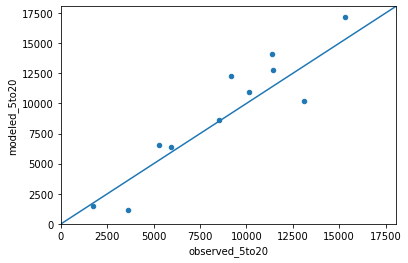

In [21]:
if len(_df) > 0: 
    ax = _df.plot(kind='scatter', x='observed_5to20', y='modeled_5to20')
    lim = _df[['observed_5to20','modeled_5to20']].max().max()*1.05
    ax.set_ylim(0,lim)
    ax.set_xlim(0,lim)
    x = np.linspace(*ax.get_xlim())
    ax.plot(x, x)
    slope, intercept, r_value, p_value, std_err = stats.linregress(_df['observed_5to20'],_df['modeled_5to20'])
    print('r^2 ' + str('') + ': ' + str(r_value))

---
### Lines by Agency

r^2 Community Transit: 0.8987838835006404


r^2 Everett Transit: -0.3801722549501035
r^2 King County Metro: 0.9313767872095445
r^2 Kitsap Transit: 0.7841004179940817
r^2 Pierce Transit: 0.8895232228572432
r^2 Sound Transit: 0.9942293521679356


r^2 Washington Ferries: 0.934723837315396


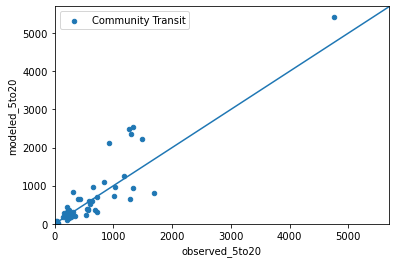

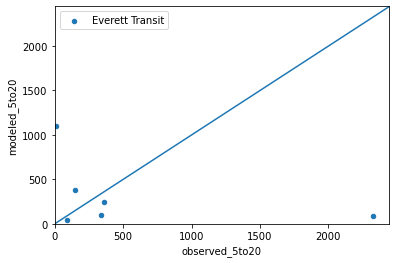

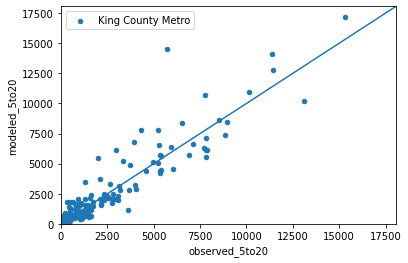

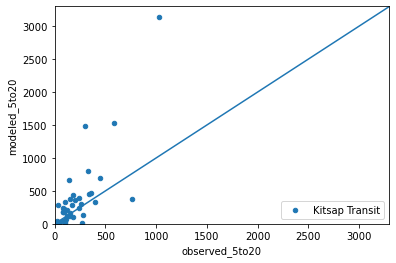

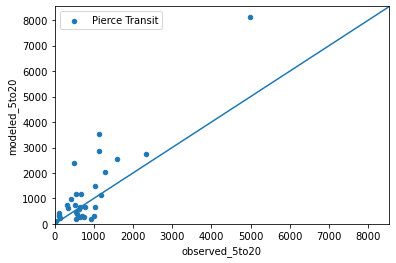

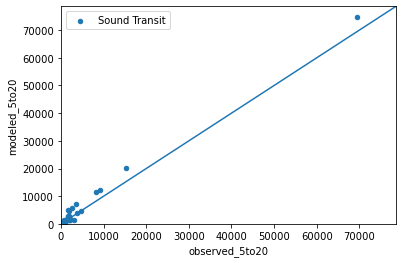

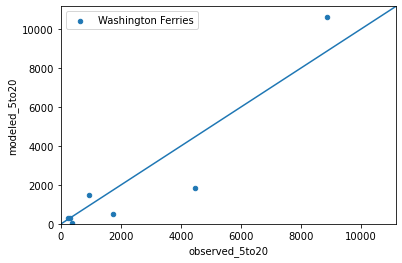

In [22]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'daily_boardings_by_line.csv', index_col='agency')
df = df[-df['agency_id'].isnull()]

for agency in np.unique(df.index):
    _df = df.loc[agency,:]
    if (type(_df) == pd.core.frame.DataFrame) & (len(df) > 0):
        ax = _df.plot(kind='scatter', x='observed_5to20', y='modeled_5to20', label=agency)
        lim = _df[['observed_5to20','modeled_5to20']].max().max()*1.05
        ax.set_ylim(0,lim)
        ax.set_xlim(0,lim)
        x = np.linspace(*ax.get_xlim())
        ax.plot(x, x)
        slope, intercept, r_value, p_value, std_err = stats.linregress(_df['observed_5to20'],_df['modeled_5to20'])
        print('r^2 ' + str(agency) + ': ' + str(r_value))

# Light Rail Station Boardings
----
Red Line

In [23]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'light_rail_boardings.csv', index_col='station_name')
df['diff'] = df['modeled_5to20']-df['observed_5to20']
df['percent_diff'] = df['diff']/df['observed_5to20']
df[['percent_diff']] = df[['percent_diff']].applymap(format_percent)
df

,observed_5to20,modeled_5to20,diff,percent_diff
station_name,,,,
Husky Stadium,"9,416","11,000","1,585",16.83%
Westlake,"10,904","8,423","-2,480",-22.75%
University St,"5,257","6,599","1,342",25.53%
Pioneer Square,"3,865","6,158","2,293",59.33%
Int'l District,"5,647","3,699","-1,948",-34.50%
Capitol Hill,"7,016","7,640",624,8.89%
Stadium,"1,912",877,"-1,035",-54.12%
SODO,"2,108","3,480","1,372",65.11%
Beacon Hill,"2,587","2,418",-170,-6.56%


Sound Transit Station Groupings

In [24]:
df_combined = df.copy()

df_combined['station_group'] = df.index
df_combined.loc[['Westlake'],'station_group'] = 'Westlake/University St'
df_combined.loc[['University St'],'station_group'] = 'Westlake/University St'

df_combined.loc[['Pioneer Square'],'station_group'] = "Pioneer Square/Int'l District"
df_combined.loc[["Int'l District"],'station_group'] = "Pioneer Square/Int'l District"

df_combined.loc[['Stadium'],'station_group'] = 'Stadium/SODO'
df_combined.loc[['SODO'],'station_group'] = 'Stadium/SODO'

df_combined.loc[['Beacon Hill'],'station_group'] = 'Beacon Hill/Mount Baker'
df_combined.loc[['Mount Baker'],'station_group'] = 'Beacon Hill/Mount Baker'

df_combined.loc[['Othello'],'station_group'] = 'Othello/Rainier Beach'
df_combined.loc[['Rainier Beach'],'station_group'] = 'Othello/Rainier Beach'

df_combined = df_combined.groupby('station_group').sum()[['observed_5to20','modeled_5to20']]
df_combined['diff'] = df_combined['modeled_5to20']-df_combined['observed_5to20']
df_combined['percent_diff'] = df_combined['diff']/df_combined['observed_5to20']
df_combined[['percent_diff']] = df_combined[['percent_diff']].applymap(format_percent)

df_combined.loc[['Husky Stadium','Capitol Hill','Westlake/University St',"Pioneer Square/Int'l District",
                 'Stadium/SODO','Beacon Hill/Mount Baker','Columbia City','Othello/Rainier Beach',
                "Tukwila Int'l Blvd",'SeaTac/Airport','Angle Lake']]

,observed_5to20,modeled_5to20,diff,percent_diff
station_group,,,,
Husky Stadium,"9,416","11,000","1,585",16.83%
Capitol Hill,"7,016","7,640",624,8.89%
Westlake/University St,"16,161","15,023","-1,138",-7.04%
Pioneer Square/Int'l District,"9,512","9,857",345,3.63%
Stadium/SODO,"4,020","4,357",337,8.39%
Beacon Hill/Mount Baker,"4,809","4,878",69,1.43%
Columbia City,"2,376","2,683",307,12.91%
Othello/Rainier Beach,"4,412","5,401",989,22.41%
Tukwila Int'l Blvd,"2,779","3,190",411,14.79%


# Stop Transfers

### Light Rail

In [25]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'light_rail_transfers.csv', index_col='station_name')
pd.options.display.float_format = '{:0,.2f}'.format
df[['percent_diff']] = df[['percent_diff']].applymap(format_percent)
df

,modeled_transfer_rate,observed_transfer_rate,diff,percent_diff
station_name,,,,
Husky Stadium,0.35,-99.00,99.35,-100.36%
Westlake,0.41,0.36,0.05,13.81%
University St,0.55,0.20,0.35,175.56%
Pioneer Square,0.50,0.16,0.34,215.96%
Int'l District,0.72,0.45,0.27,60.52%
Capitol Hill,0.06,-99.00,99.06,-100.06%
Stadium,0.30,0.12,0.18,154.67%
SODO,0.44,0.31,0.13,40.65%
Beacon Hill,0.36,0.35,0.00,1.15%


# Externals

In [26]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'external_volumes.csv', index_col='location')
pd.options.display.float_format = '{:0,.0f}'.format
df = df.drop('diff', axis=1)
df['diff'] = df['modeled']-df['observed']
df = df.fillna(0)
df.loc['Total',['observed','modeled','diff']] = df[['observed','modeled','diff']].sum()
df['percent_diff'] = df['diff']/df['observed']
df[['percent_diff']] = df[['percent_diff']].applymap(format_percent)

df[['external_station']] = df[['external_station']].applymap('{:0.0f}'.format)
df.replace('nan', '', regex=True)

,external_station,county,observed,modeled,diff,percent_diff
location,,,,,,
I-5 to Olympia,3733,Pierce,"130,000","123,950","-6,050",-4.65%
I-5 to Mount Vernon,3744,Snohomish,"67,000","53,281","-13,719",-20.48%
I-90 @ Snoqualmie Pass,3739,King,"33,000","27,455","-5,545",-16.80%
SR-532 to Camano Island,3746,Snohomish,"23,000","19,079","-3,921",-17.05%
SR-507 to Yelm,3734,Pierce,"23,000","18,255","-4,745",-20.63%
SR-3 to Belfair,3749,Kitsap,"18,000","15,028","-2,972",-16.51%
Hood Canal Bridge,3748,Kitsap,"18,000","15,307","-2,693",-14.96%
SR-530 N/O Stanwood,3745,Snohomish,"9,100","7,966","-1,134",-12.47%
Mukilteo-Clinton Ferry,3747,Snohomish,"6,300","5,479",-821,-13.03%


# Corridor Speed

<AxesSubplot:xlabel='observed_speed', ylabel='model_speed'>

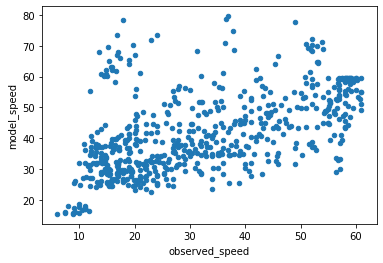

In [27]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'corridor_speeds.csv')
df.plot(kind='scatter', y='model_speed', x='observed_speed')

### AM Peak, Primary Corridors

<AxesSubplot:xlabel='observed_speed', ylabel='model_speed'>

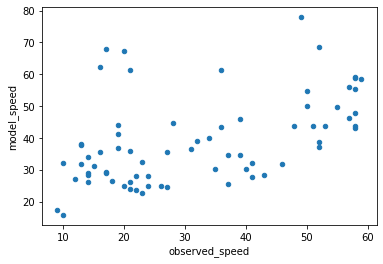

In [28]:
df[df['tod'] == '7to8'].plot(kind='scatter', x='observed_speed', y='model_speed')

In [29]:
# Show daily AM and PM peaks by corridor
df[df['tod'] == '7to8'][['Corridor_Description','model_speed','observed_speed']].head(20)

,Corridor_Description,model_speed,observed_speed
6,Seattle to Everett - NB,43,58
15,Everett to Seattle - SB,25,27
24,Tacoma to Seattle - NB,25,24
33,Seattle to Tacoma - SB,44,58
42,Bellevue to Lynnwood - NB,46,57
51,Lynnwood to Bellevue - SB,24,22
60,Tukwila to Bellevue - NB,25,20
69,Bellevue to Tukwila - SB,28,43
78,Auburn to Renton - NB,28,22
87,Renton to Auburn - SB,50,55


### PM Peak, Primary Corridors

<AxesSubplot:xlabel='observed_speed', ylabel='model_speed'>

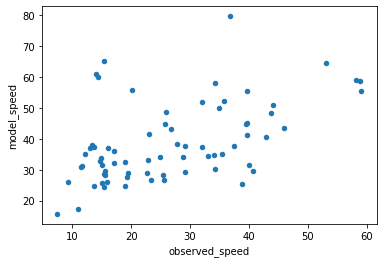

In [30]:
df[df['tod'] == '16to17'].plot(kind='scatter', x='observed_speed', y='model_speed')

In [31]:
df[df['tod'] == '16to17'][['Corridor_Description','model_speed','observed_speed']].head(20)

,Corridor_Description,model_speed,observed_speed
1,Seattle to Everett - NB,27,23
10,Everett to Seattle - SB,38,28
19,Tacoma to Seattle - NB,41,43
28,Seattle to Tacoma - SB,28,25
37,Bellevue to Lynnwood - NB,27,26
46,Lynnwood to Bellevue - SB,41,40
55,Tukwila to Bellevue - NB,29,29
64,Bellevue to Tukwila - SB,25,19
73,Auburn to Renton - NB,48,44
82,Renton to Auburn - SB,30,34
